In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, metrics
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import precision_score, classification_report, confusion_matrix, recall_score

In [4]:
from google.colab import files
uploaded = files.upload()

Saving NSL_KDD_Train.csv to NSL_KDD_Train.csv


In [5]:
import io
train = pd.read_csv(io.BytesIO(uploaded['NSL_KDD_Train.csv']))

In [6]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'])
train.columns = columns
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [7]:
def attack (row):
    if (row['attack'] != 'normal'):
        attack = 1
        return attack
    else :
        attack = 0
        return attack

In [8]:
train['isattack']=train.apply(attack,axis=1)

In [9]:
# get the intial set of encoded features and encode them
features_to_encode = ['protocol_type', 'service', 'flag']
encoded = pd.get_dummies(train[features_to_encode])

# get numeric features, we won't worry about encoding these at this point
numeric_features = ['duration', 'src_bytes', 'dst_bytes']

# model to fit/test
to_fit = encoded.join(train[numeric_features])

In [10]:
y_train=train['isattack'].values
x_train, x_test, y_train, y_test = train_test_split(to_fit, y_train, test_size=0.6)

In [11]:
x_train.shape

(50388, 87)

# Model fitting

**RBF_SVC**

In [12]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
rbf_svc.fit(x_train, y_train)

SVC(gamma=0.7)

In [13]:
rbf_svc.score(x_train, y_train)

0.9944232753830277

In [14]:
rbf_svc_pred = rbf_svc.predict(x_test)
print("Accuracy",metrics.accuracy_score(y_test,rbf_svc_pred))

Accuracy 0.9813320279424217


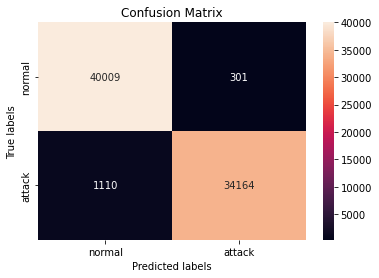

In [15]:
cm = confusion_matrix(y_test, rbf_svc_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['normal', 'attack']); ax.yaxis.set_ticklabels(['normal', 'attack']);

In [16]:
print(classification_report(y_test,rbf_svc_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     40310
           1       0.99      0.97      0.98     35274

    accuracy                           0.98     75584
   macro avg       0.98      0.98      0.98     75584
weighted avg       0.98      0.98      0.98     75584



**POLY_SVC**

In [20]:
poly_svc = svm.SVC(kernel='poly', degree=3, C=1.0)
poly_svc.fit(x_train, y_train)

SVC(kernel='poly')

In [21]:
poly_svc.score(x_train, y_train)

0.5366158609192665

In [22]:
poly_svc_pred = poly_svc.predict(x_test)
print("Accuracy",metrics.accuracy_score(y_test,poly_svc_pred))

Accuracy 0.5334726926333616


**LinearSVC**

In [17]:
lin_svc = svm.LinearSVC(C=1.0)
lin_svc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [18]:
lin_svc.score(x_train, y_train)

0.9386361832182266

In [19]:
lin_svc_pred = lin_svc.predict(x_test)
print("Accuracy",metrics.accuracy_score(y_test,lin_svc_pred))

Accuracy 0.9365209568162574


# Grid search

In [23]:
from sklearn.model_selection import GridSearchCV

In [25]:
C_grid = 0.02*np.arange(1,50)
gamma_grid = 0.02*np.arange(1,50)
parameters = {'C': C_grid, 'gamma' : gamma_grid}
gridCV = GridSearchCV(svm.SVC(kernel='rbf'), parameters, n_jobs=-1)             
gridCV.fit(x_train[:1000], y_train[:1000])
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']

In [26]:
print("SVM best C : " + str(best_C))
print("SVM best gamma : " + str(best_gamma))

SVM best C : 0.9400000000000001
SVM best gamma : 0.12


In [32]:
gridCVdf = pd.DataFrame(gridCV.cv_results_)

In [35]:
gridCVdf[['param_C','param_gamma','mean_test_score']]

,param_C,param_gamma,mean_test_score
0,0.02,0.02,0.884
1,0.02,0.04,0.884
2,0.02,0.06,0.884
3,0.02,0.08,0.884
4,0.02,0.1,0.884
...,...,...,...
2396,0.98,0.9,0.970
2397,0.98,0.92,0.970
2398,0.98,0.94,0.970
2399,0.98,0.96,0.970


In [27]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.12, C=0.94)
rbf_svc.fit(x_train, y_train)

SVC(C=0.94, gamma=0.12)

In [28]:
rbf_svc.score(x_train, y_train)

0.9842224339128364

In [29]:
rbf_svc_pred_g = rbf_svc.predict(x_test)
print("Accuracy",metrics.accuracy_score(y_test,rbf_svc_pred_g))

Accuracy 0.9828138230313294


# Random search

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
C_random = 0.02*np.arange(1,50)
gamma_random = 0.02*np.arange(1,50)
parameters = {'C': C_random, 'gamma' : gamma_random}
randomCV = RandomizedSearchCV(svm.SVC(kernel='rbf'), parameters, n_jobs=-1, n_iter=500)             
randomCV.fit(x_train[:1000], y_train[:1000])
best_C = randomCV.best_params_['C']
best_gamma = randomCV.best_params_['gamma']

In [38]:
print("SVM best C : " + str(best_C))
print("SVM best gamma : " + str(best_gamma))

SVM best C : 0.9400000000000001
SVM best gamma : 0.12


In [44]:
print(randomCV.best_score_)

0.9789999999999999


In [42]:
randomCVdf = pd.DataFrame(randomCV.cv_results_)

In [43]:
randomCVdf[['param_C','param_gamma','mean_test_score']]

,param_C,param_gamma,mean_test_score
0,0.26,0.18,0.968
1,0.22,0.5,0.961
2,0.72,0.82,0.967
3,0.92,0.18,0.977
4,0.48,0.36,0.969
...,...,...,...
495,0.3,0.66,0.963
496,0.56,0.42,0.969
497,0.02,0.36,0.887
498,0.46,0.42,0.967
